# Sigular Value Decomposition (SVD)

- Writer:
  Zihang.WANG
  
- Enironments:
  * python3
  * numpy
  * matploblib

## Background
Our class taught a fascinating topic involving matrix decomposition, specifically diagonalization, also known as EVD (eigenvalue decomposition). This technique simplifies the transformation of a matrix into three matrices. However, a major limitation remains - it is only applicable to square matrices.

Is there a mechanism to bypass this limitation and elegantly apply the transformation to any matrix? Fortunately, the same purpose may be achieved with the assistance of singular value decomposition (referred to as SVD in this paper).

Denoted as: $A = U \cdot \Sigma \cdot V^T$, Where the columns of $U$ are orthonormal eigenvectors of $AA^T$, the columns of $V$ are orthonormal eigenvectors of $A^TA$, and $\Sigma$ is a diagonal matrix containing the square roots of eigenvalues from $U$ or $V$ in descending order.


One of the most generally cited explanations for understanding the process of Singular Value Decomposition (SVD) requires picturing three unique transformations of a sphere, as illustrated below:

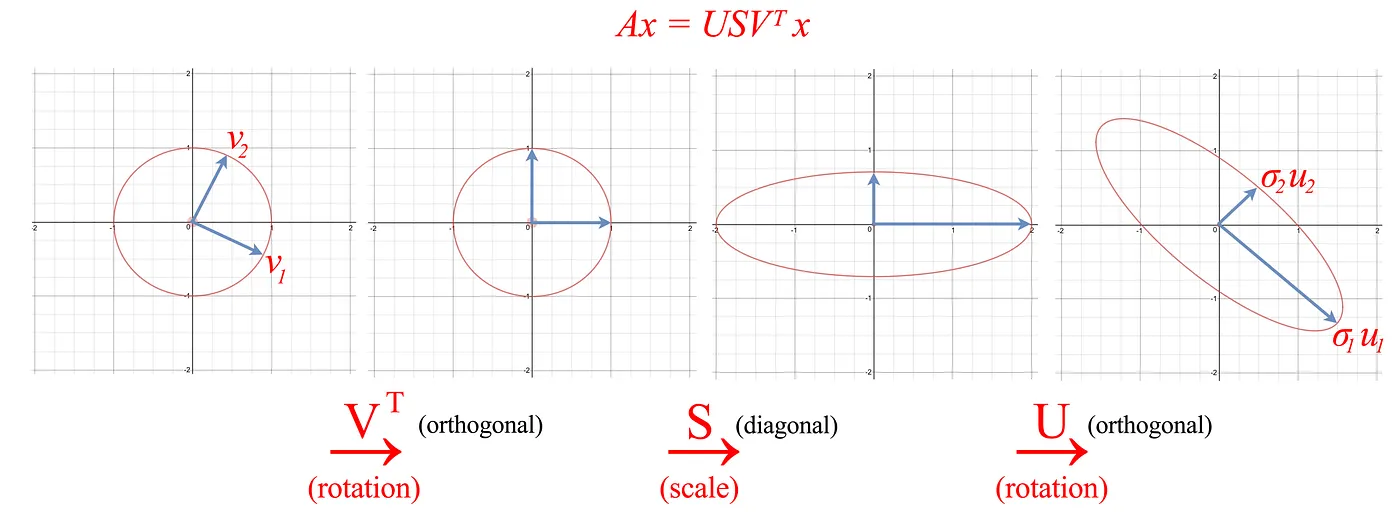

But it is still challenging to understand what exactly the SVD is, especially after a long and boring calculation, you still need to imagine the full transformation.

In this research, our emphasis will turn towards illustrating SVD's role in dimensionality reduction and exploring its practical use, specifically in the field of image compression. 

## Intro

Singular values share commonalities with eigenvalues. They are placed in descending order within the singular value matrix, and particularly, they display a quick reduction. In some situations, the cumulative amount of the top 10% or even 1% of singular values reaches 99% of the entire sum of all singular values. In practical terms, this suggests that utilizing the greatest k singular values combined with their associated left and right singular vectors could provide an effective approximation for describing the matrix.

denoted as $A_{mn} = U_{mm}\Sigma_{mn}V^T_{nn} \approx U_{mk}\Sigma_{kk}V_{kn}^T$ 

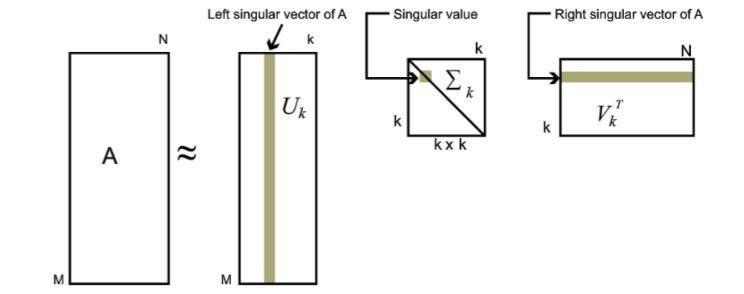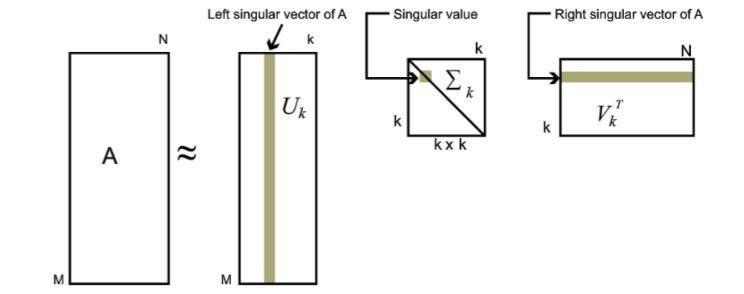

Let's start with a concreted example to check this property. Suppose we need to apply the SVD on this matrix:

In [1]:
# Environment
import numpy as np
import matplotlib.pyplot as plt

In [2]:
A = np.arange(1,10).reshape(3,3)
print('A =', A)

A = [[1 2 3]
 [4 5 6]
 [7 8 9]]


In [3]:
U, S, V = np.linalg.svd(A)
S = np.around(S,decimals = 2)
print('U =',U,'\n')
print('S =',S,'\n')
print('V =',V)

U = [[-0.21483724  0.88723069  0.40824829]
 [-0.52058739  0.24964395 -0.81649658]
 [-0.82633754 -0.38794278  0.40824829]] 

S = [16.85  1.07  0.  ] 

V = [[-0.47967118 -0.57236779 -0.66506441]
 [-0.77669099 -0.07568647  0.62531805]
 [-0.40824829  0.81649658 -0.40824829]]


It is easy to find that $\delta_1$, which is 16.85 takes the largest part of the sigular value matrix.
In this case, we can find out what will happen if we reduce the dimension of the matrix to 1 by setting k = 1 

In [4]:
# Choose the top 1 singular value and corresponding vectors
k = 1
U_reduced = U[:, :k]
S_reduced = np.diag(S[:k])
V_reduced = V[:k, :]

# Approximate the original matrix A with reduced dimension
A_reduced = U_reduced @ S_reduced @ V_reduced

# Print the original and reduced matrices
print("Original Matrix A:")
print(A)

print("\nReduced Matrix A (Dimension 1):")
print(A_reduced)

Original Matrix A:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

Reduced Matrix A (Dimension 1):
[[1.73641325 2.07197569 2.40753813]
 [4.20762641 5.02075163 5.83387684]
 [6.67883958 7.96952757 9.26021556]]


Comparing the figures of before compression and after compression, there is a large similarity.

In conslusion, both the array and the figure suggest the feasibility to utilise the compression via SVD approach on any matrix we want. 

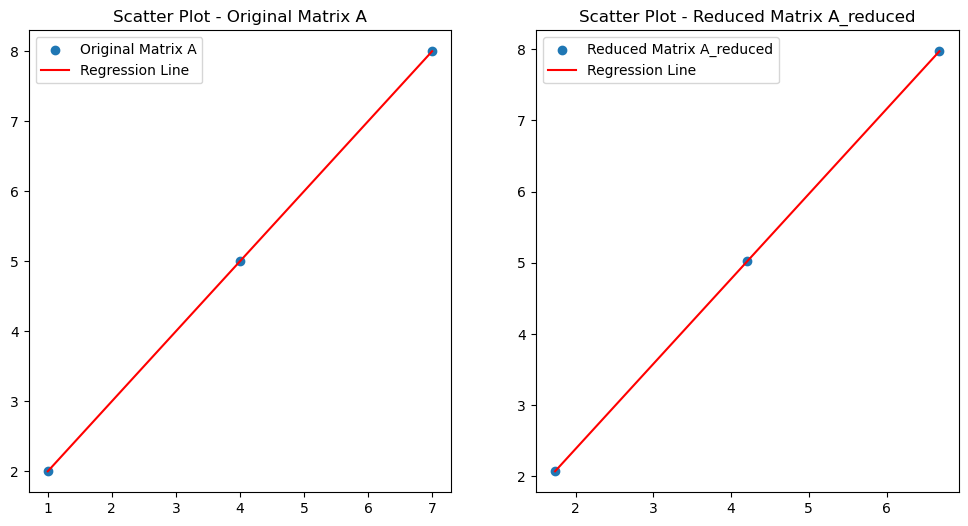

In [5]:
# Scatter plot and regression line for the original matrix A
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(A[:, 0], A[:, 1], label='Original Matrix A')
plt.title('Scatter Plot - Original Matrix A')

# Adding regression line
plt.plot(A[:, 0], A[:, 1], 'r-', label='Regression Line')
plt.legend()

# Scatter plot and regression line for the reduced matrix A_reduced
plt.subplot(1, 2, 2)
plt.scatter(A_reduced[:, 0], A_reduced[:, 1], label='Reduced Matrix A_reduced')
plt.title('Scatter Plot - Reduced Matrix A_reduced')


# Adding regression line
plt.plot(A_reduced[:, 0], A_reduced[:, 1], 'r-', label='Regression Line')
plt.legend()

plt.show()


## Application in photo compression

In the last part, we found into this amazing trick with SVD—it enables us compress a matrix down to any size we desire, just by altering that k-value. Sure, it will lose a bit of precision along the way, but locate the sweet spot for k, and we can give our matrix a facelift while maintaining its fundamental "original features."

Admittedly, it might still sound a bit abstract. So, let's see how does it work with a down-to-earth instance. 

Images are represented in a rectangular array where each element corresponds to the grayscale value for that pixel. For coloured images we have a 3-dimensional array of size n×m×3, where n and m represent the number of pixels vertically and horizontally, respectively, and for each pixel we store the intensity for colours red, green and blue.


In [6]:
# Environment
import matplotlib.image as image

We create 3 matrixs as RGB channels then apply SVD to each matrix

In [7]:
ph = image.imread("head.jpg")
# RGB channel devide 255 to get value in (0-1)
R = ph[:,:,0] / 255
G = ph[:,:,1] / 255
B = ph[:,:,2] / 255

In [8]:
# SVD
R_U, R_S, R_V = np.linalg.svd(R)
G_U, G_S, G_V = np.linalg.svd(G)
B_U, B_S, B_V = np.linalg.svd(B)

In [9]:
# Build the new compressed matrix with K value
def compress(U,S,V,k):
    return U[:,:k]@np.diag(S[:k])@V[:k,:]  

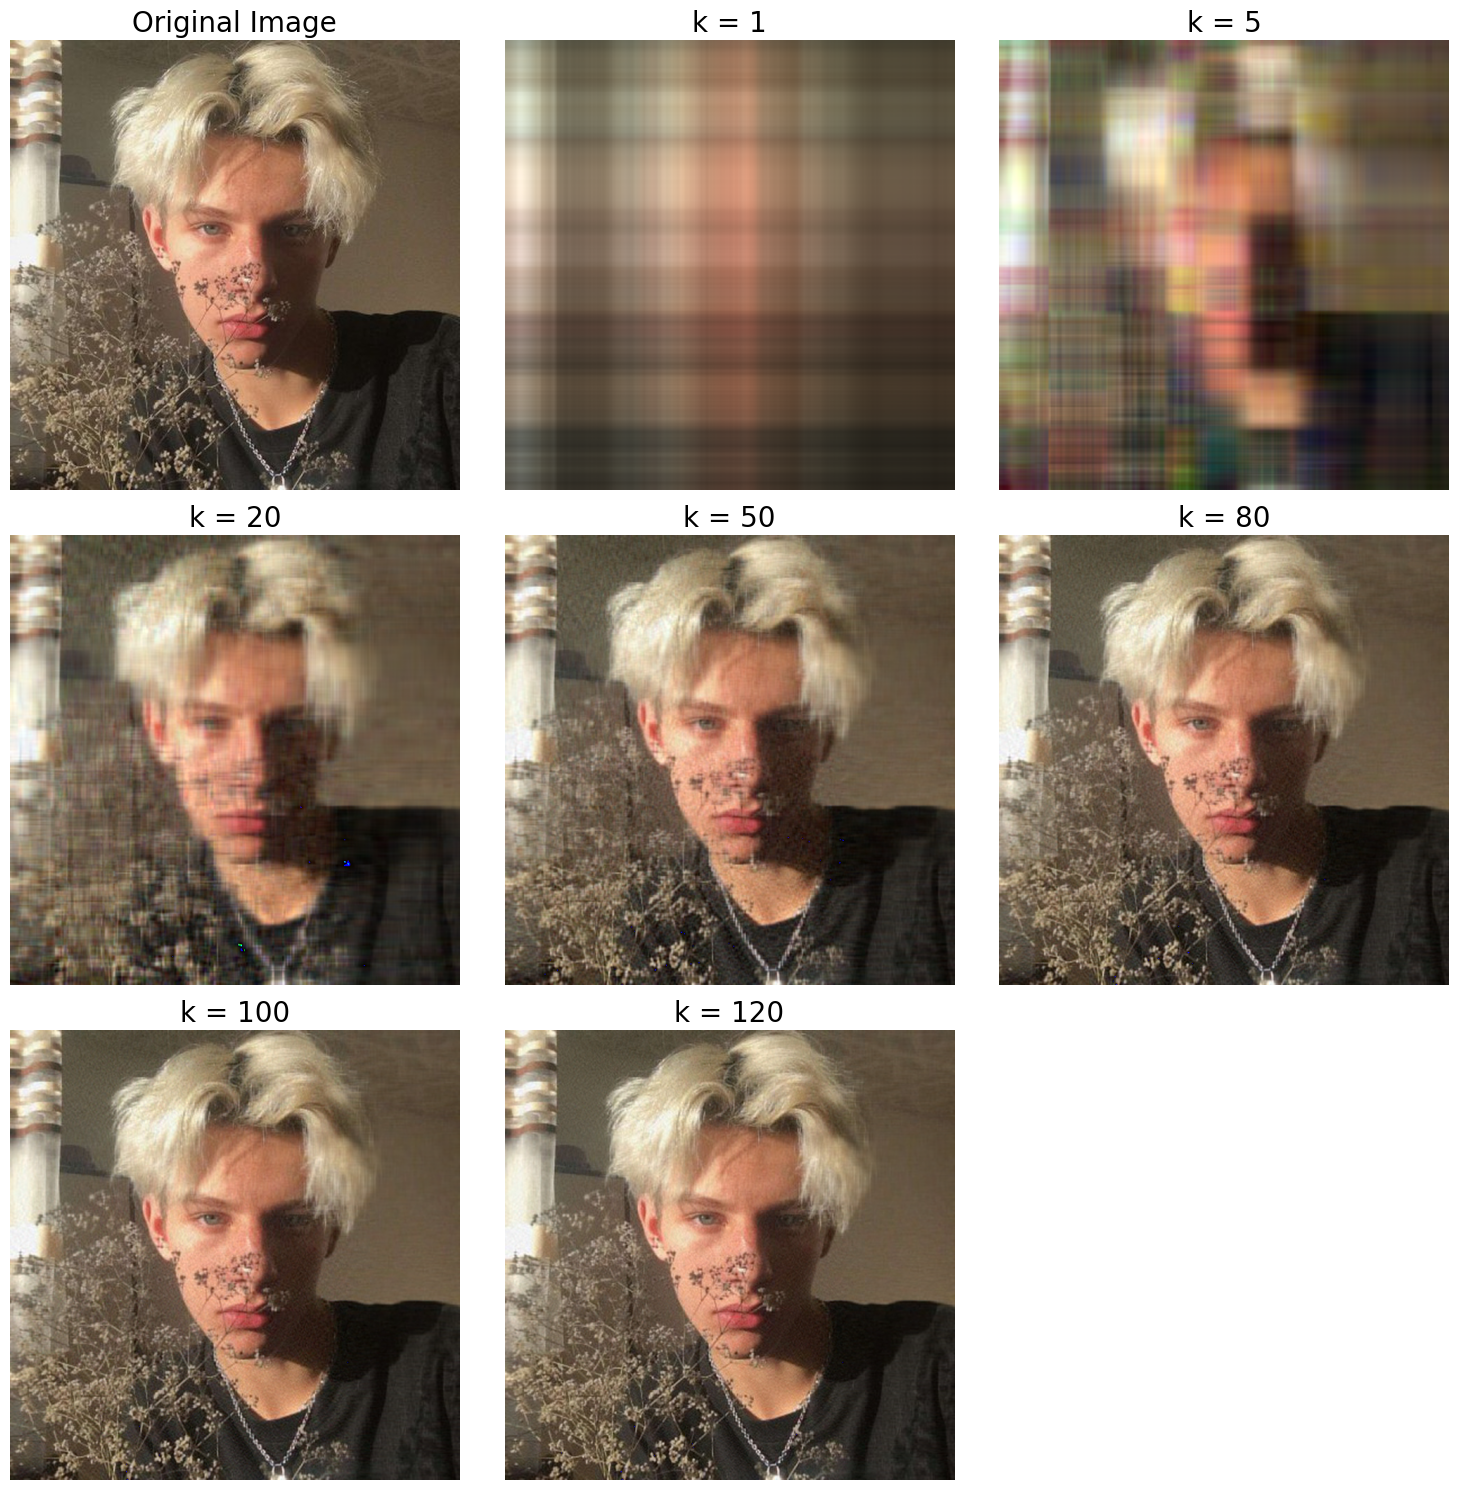

In [10]:
# set the range of different K values
k_values = [1,5,20,50,80,100,120]
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Display the original image in the first subplot
axes[0, 0].imshow(ph)
axes[0, 0].set_title('Original Image',fontsize = 20)
axes[0, 0].axis('off')

for i,k in enumerate(k_values):
    # create the compressed image
    R_compressed = compress(R_U, R_S, R_V,k)
    G_compressed = compress(G_U, G_S, G_V,k)
    B_compressed = compress(B_U, B_S, B_V,k)
    total_compressed = np.dstack((R_compressed, G_compressed, B_compressed))
    ph_compressed = (np.minimum(total_compressed, 1.0) * 0xff).astype(np.uint8)


    # Calculate the row and column indices for the current subplot
    row = (i+1) // 3
    col = (i+1) % 3
    
    # Display the compressed image in the subplot
    axes[row, col].imshow(ph_compressed)
    axes[row, col].set_title(f'k = {k}',fontsize=20)
    axes[row, col].axis('off')
fig.delaxes(axes[2, 2])
plt.tight_layout()
plt.show()

## Conclusion

Indeed, following image compression by SVD, the picture's quality (resolution) becomes dependant on the chosen k-value. As the k-value decreases, the quality decreases correspondingly. Simply put, by choosing a good value for k, we may efficiently reduce the image size while maintaining a feasible range of quality.

## Credits:
1. [Machine Learning — Singular Value Decomposition (SVD) & Principal Component Analysis (PCA), Jonathan Hui](https://jonathan-hui.medium.com/machine-learning-singular-value-decomposition-svd-principal-component-analysis-pca-1d45e885e491)
2. [SVD and image compression, Unajacimovic](https://medium.com/mlearning-ai/svd-and-image-compression-749d59558410)
3. [A Geometrical Understanding of Matrices, gregory gundersen](https://gregorygundersen.com/blog/2018/10/24/matrices/)